In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
DATA_FREQUENCY = dt.timedelta(minutes=5)

In [3]:
def difference(x, d):
    for _ in range(d):
        x = x[1:] - x[:-1]
    
    return x

def seasonal_difference(x, s):
    return x[s:] - x[:-s]

def plot_correlations(x, nlags=256):
    plt.figure(figsize=(16,5))
    plt.stem(acf(x, nlags=nlags))
    plt.show()
    plt.figure(figsize=(16,5))
    plt.stem(pacf(x, nlags=nlags))
    plt.show()

In [4]:
train = np.load("../data/inputs/5083_P2_o3_h6_sb3_sensor_data/train.npz")
val = np.load("../data/inputs/5083_P2_o3_h6_sb3_sensor_data/train.npz")
test = np.load("../data/inputs/5083_P2_o3_h6_sb3_sensor_data/train.npz")

In [5]:
x_train = train["x"]
y_train = train["y"]

In [6]:
x_train.shape

(6510, 3, 15, 2)

In [7]:
y_train.shape

(6510, 6, 15, 2)

In [8]:
x = x_train[:500, 0, 0, 1]
y = y_train[:500, 0, 0, 1]

In [9]:
x.shape

(500,)

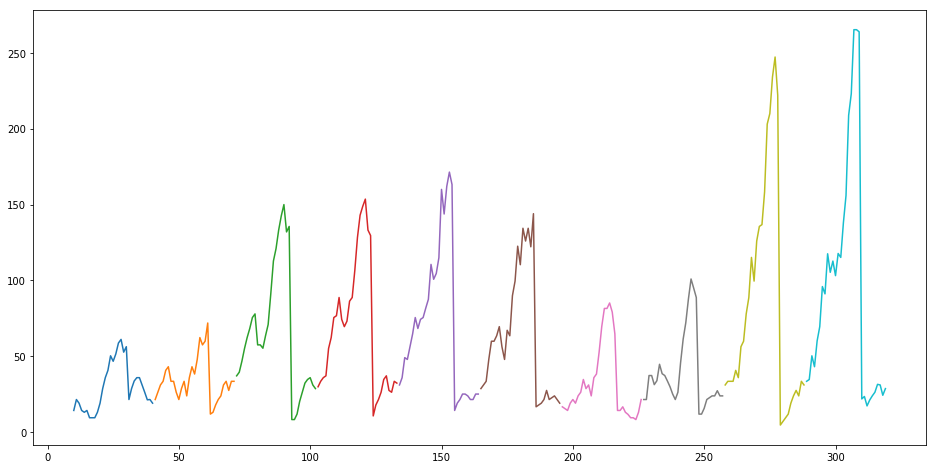

In [10]:
plt.figure(figsize=(16, 8))
j = 31
c=10
for i in range(10):
    plt.plot(np.arange(j*i+c, j*(i+1)+c), x[j*i+c:j*(i+1)+c])
plt.show()

In [11]:
x_0_0 = x
x_1_0 = difference(x, 1)
x_0_1 = seasonal_difference(x, 31)
x_1_1 = difference(seasonal_difference(x, 31), 1)

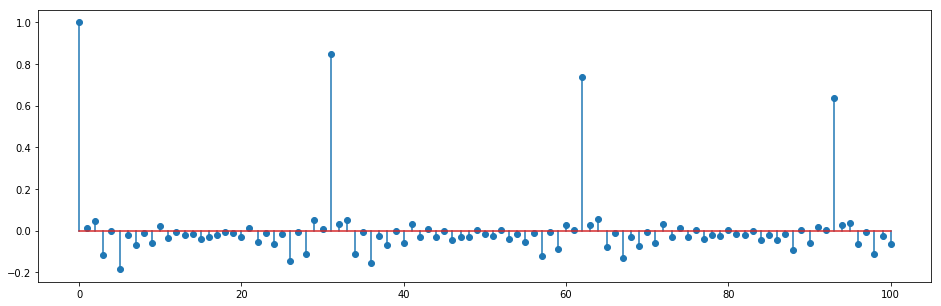

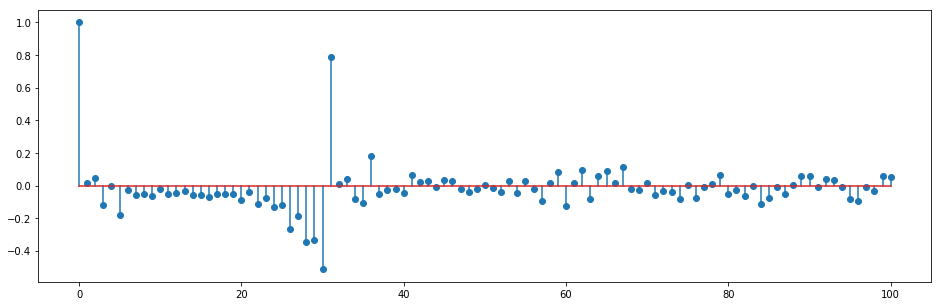

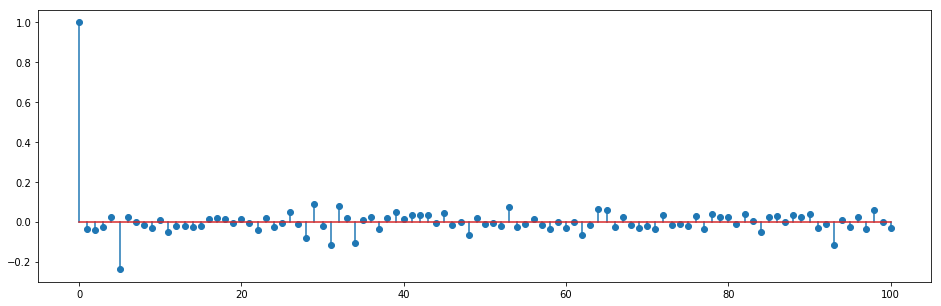

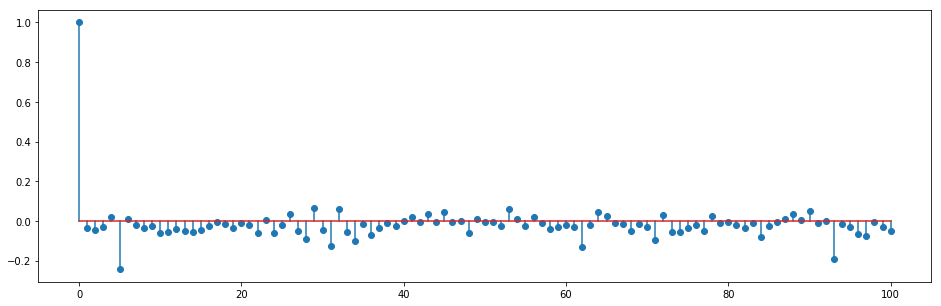

In [12]:
nlags = 100
#plot_correlations(x_0_0, nlags=nlags)
plot_correlations(x_1_0, nlags=nlags)
#plot_correlations(x_0_1, nlags=nlags)
plot_correlations(x_1_1, nlags=nlags)

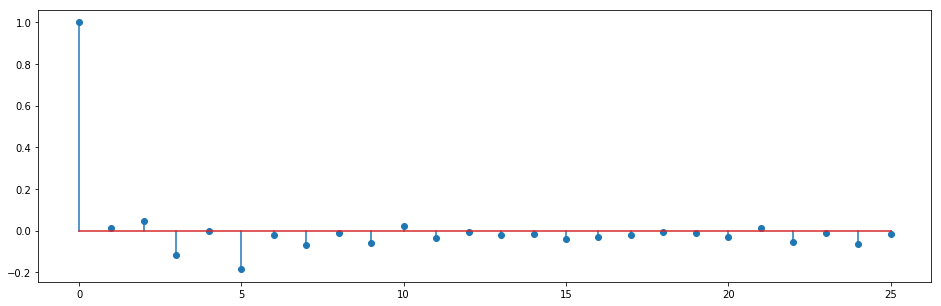

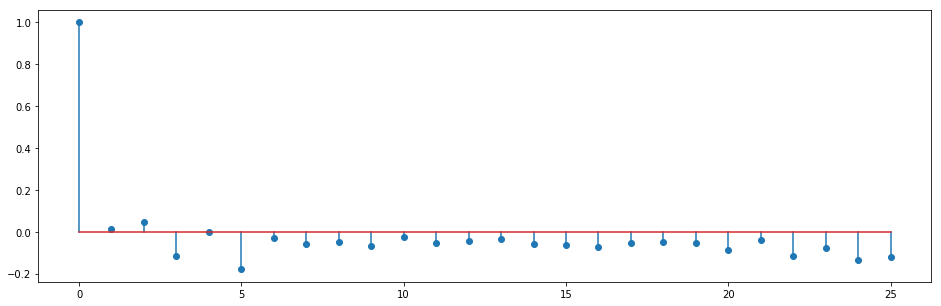

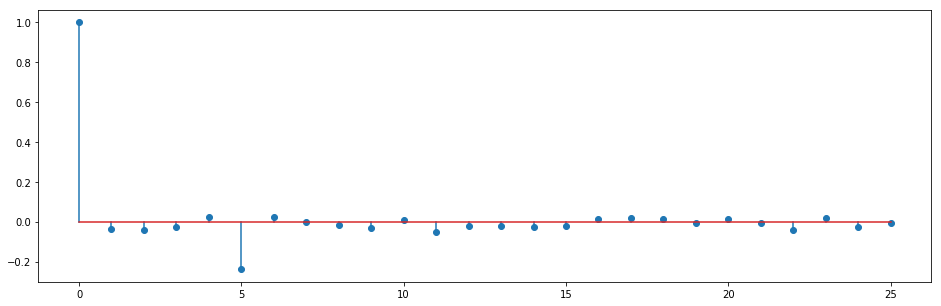

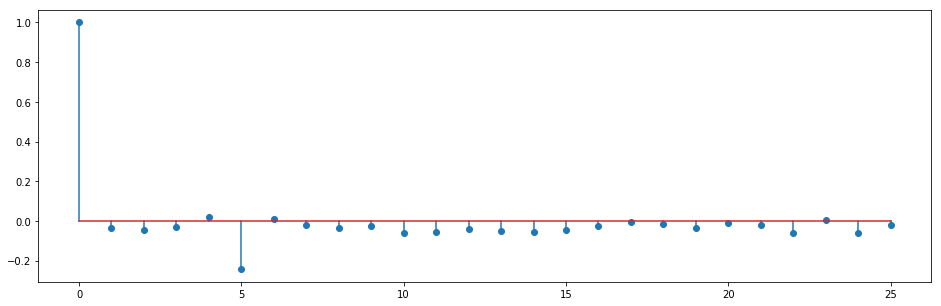

In [13]:
nlags = 25
#plot_correlations(x_0_0, nlags=nlags)
plot_correlations(x_1_0, nlags=nlags)
#plot_correlations(x_0_1, nlags=nlags)
plot_correlations(x_1_1, nlags=nlags)

In [ ]:
def fit_sarimax(x, order, seasonal_order, y_test):
    model = SARIMAX(x, order=order, seasonal_order=order)    
    results = model.fit()
    
    print("SSR: {}".format(np.power(results.resid, 2)))
    print("AIC: {}".format(results.aic))
    print("BIC: {}".format(results.bic))
    print("SSR: {}".format())
    
    if seasonal_order == (0, 0, 0, 0):

In [92]:
model1 = SARIMAX(x_0_0, order=(1, 1, 0))
results1 = model1.fit()

In [94]:
results1.forecast(1)

array([9.56670386])

In [107]:
results1.predict(450, 505, dynamic=False)

array([ 26.56648068,  31.26659227,  34.44439485,  38.45549356,
        39.21109871,  38.38890129,  42.45549356,  43.21109871,
        55.36648068,  64.93318454,  61.55560515,  75.3886781 ,
        79.25549356,  69.46681546,  63.11121031,  68.87769098,
        20.94517601,  21.6       ,  19.97780258,  21.62219742,
        19.97780258,  26.48878969,  28.83329614,  32.85549356,
        31.17780258,  30.38890129,  33.64439485,  36.03329614,
        39.24439485,  57.04417166,  65.72208583,  57.48901288,
        55.16670386,  60.06659227,  46.2113219 ,  49.64439485,
        50.41109871,  67.43307295,  74.49988841,  83.32208583,
        94.55538196, 113.05527037, 117.66659227, 105.43351932,
       103.97780258, 103.18890129, 102.38890129,   3.44595717,
         7.23329614,  12.06659227,   9.56670386,   9.56624193,
         9.56623553,   9.56623544,   9.56623544,   9.56623544])

In [106]:
model2 = SARIMAX(x_0_0, order=(1, 1, 0))
results2 = model2.smooth(results1.params)

In [110]:
results2.forecast(1)

array([9.56670386])

In [117]:
results2.predict(450, 505, dynamic=True)

array([26.56648068, 26.56879033, 26.56882237, 26.56882281, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282, 26.56882282, 26.56882282, 26.56882282, 26.56882282,
       26.56882282])

In [113]:
model3 = SARIMAX(x_0_0[-10:], order=(1, 1, 0))
results3 = model3.smooth(results1.params)

In [114]:
results3.forecast(1)

array([9.56670386])

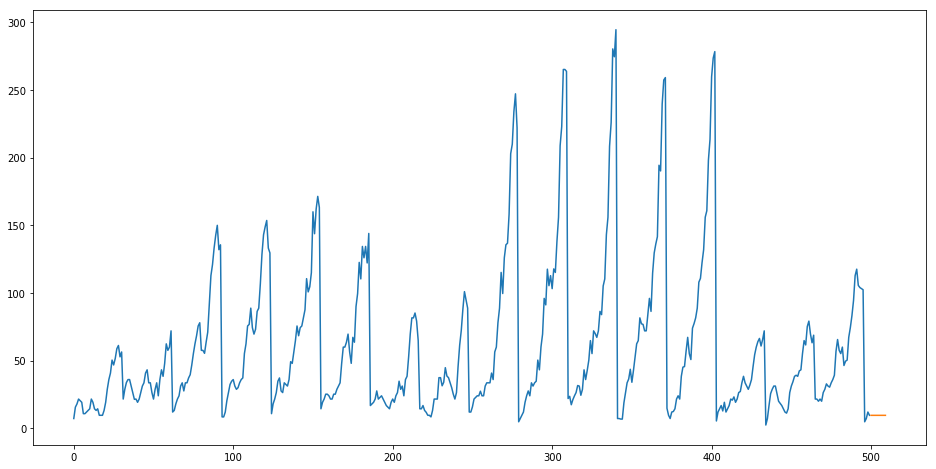

In [103]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(x_0_0.shape[0]), x_0_0)
plt.plot(np.arange(x_0_0.shape[0], x_0_0.shape[0] + 10), results.forecast(10, Dynamic=True))
plt.show()

/Users/victorchan/miniconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


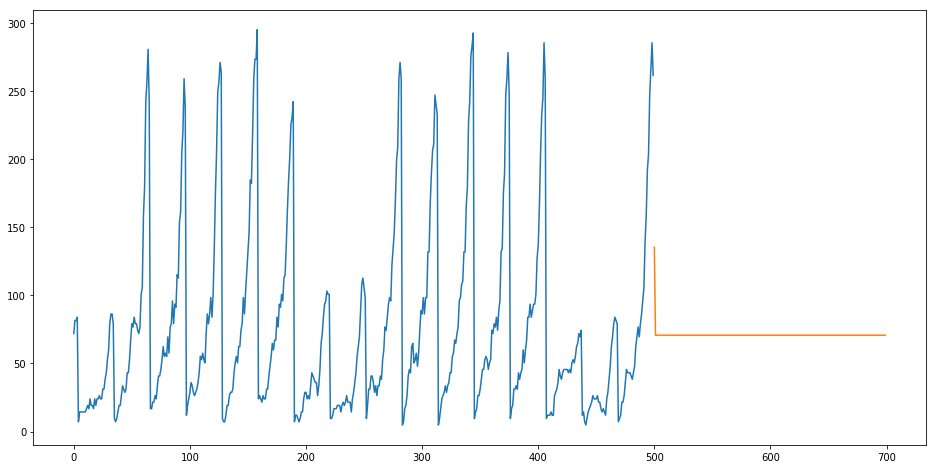

In [313]:
model = ARMA(x, (0, 1, 0, 217))
results = model.fit()
plt.figure(figsize=(16, 8))
plt.plot(np.arange(500), x[-500:])
plt.plot(np.arange(500, 700), results.forecast(200)[0])
plt.show()

In [21]:
model = SARIMAX(x, order=(0, 1, 1), seasonal_order=(0, 1, 1, 217))
results = model.fit()
plt.figure(figsize=(16, 8))
plt.plot(np.arange(500), x[-500:])
plt.plot(np.arange(500, 700), results.forecast(200))
plt.show()

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("ARMA(3, 3) Model for Flow Detector Data in 2017")
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Flow")

plt.plot(time[:5000], flow.values[:5000])
plt.plot(time[:5000], armax_model._armax_models[armax_model.get_best_model_order()].fittedvalues.values[:5000])
plt.show()

In [16]:
z = np.zeros((5, 5))

for order in arma_model._armax_models:
    m = arma_model._armax_models[order]
    z[order[0]-1, order[1]-1] = m.sse
#     print(m.aic)
#     print(m.bic)
#     print(m.sse)

print(np.round(z))

[[47007. 46859. 46720. 46637. 46816.]
 [46974. 46775. 46758. 46658. 46755.]
 [46798. 46708. 46707. 46657. 46783.]
 [46754. 46709. 46855. 46773. 46700.]
 [46659. 46676. 46706. 46742. 45380.]]


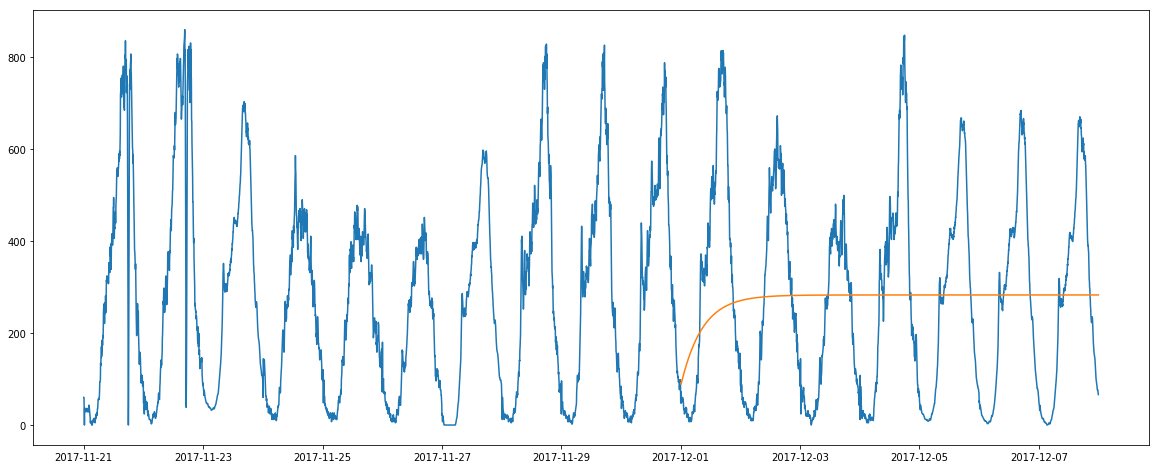

In [128]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(flow[((flow.index.month == 11) & (flow.index.day > 20)) | ((flow.index.month == 12) & (flow.index.day < 8))])
plt.plot(arma_predictions)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index0:index1], flow[index0:index1])
plt.plot(time[index0:index1], a.fittedvalues[index0:index1])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index1:index2], flow[index1:index2])
plt.plot(time[index1:index2], a.fittedvalues[index1:index2])
plt.show()